Original shape: (294076, 49)

Unique Label values BEFORE cleaning:
Label
0.0    271860
1.0     22215
Name: count, dtype: int64

Unique Label values AFTER conversion:
Label
0.0    271860
1.0     22215
Name: count, dtype: int64

Normal-only shape: (271860, 49)

Attack data shape (raw): (22215, 49)

First 3 rows of normal-only data:
        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   

   dbytes  sttl  ...  is_ftp_login  ct_ftp_cmd  ct_srv_src ct_srv_dst  \
0     164    31  ...             0           0           3          7   
1     304    31  ...             0           0           2          4   
2     178    31  ...             0           0          12          8   

   ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,632 (10.28 KB)

 Trainable params: 2,632 (10.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5447 - val_loss: 0.0873
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0743 - val_loss: 0.0295
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0250 - val_loss: 0.0130
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0120 - val_loss: 0.0073
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0067 - val_loss: 0.0049
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 9/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 10/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0038 - val_loss: 0.0029
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Reconstruction error stats:
Min: 1.3514142010932976e-0

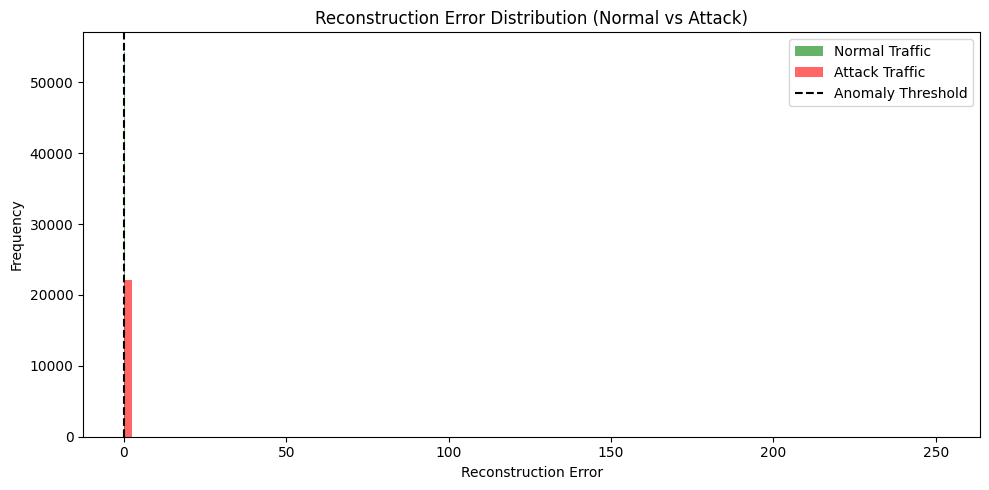

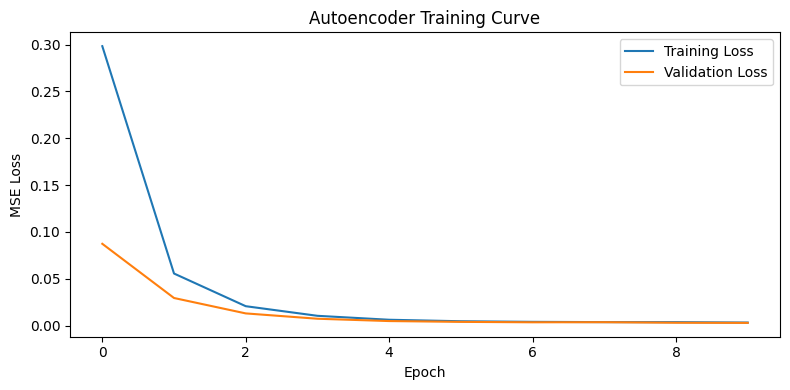

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt



df = pd.read_csv(
    r"/content/UNSW-NB15_1_with_features.csv",
    low_memory=False
)

print("Original shape:", df.shape)

print("\nUnique Label values BEFORE cleaning:")
print(df["Label"].value_counts())

df["Label"] = pd.to_numeric(df["Label"], errors="coerce")

print("\nUnique Label values AFTER conversion:")
print(df["Label"].value_counts())


normal_df = df[df["Label"] == 0]
attack_df=df[df["Label"]==1]


print("\nNormal-only shape:", normal_df.shape)
print("\nAttack data shape (raw):", attack_df.shape)

normal_df = normal_df.drop(columns=["Label"])
attack_df = attack_df.drop(columns=["Label"])
print("\nFirst 3 rows of normal-only data:")
print(normal_df.head(3))


train_df, val_df = train_test_split(
    normal_df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

train_df = train_df.select_dtypes(include=["number"])
val_df = val_df.select_dtypes(include=["number"])
attack_df = attack_df.select_dtypes(include=["number"])

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Attack data shape (numeric only):", attack_df.shape)

print("\nTrain sample:")
print(train_df.head(2))

print("\nValidation sample:")
print(val_df.head(2))

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_df)
X_val_scaled = scaler.transform(val_df)
X_attack_scaled = scaler.transform(attack_df)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled val shape:", X_val_scaled.shape)
print("Scaled attack data shape:", X_attack_scaled.shape)



input_dim=X_train_scaled.shape[1]
input_layer=Input(shape=(input_dim,))
encoded = Dense(32, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="linear")(encoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(
    optimizer="adam",
    loss="mse"
)


autoencoder.summary()

history = autoencoder.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=10,
    batch_size=256,
    validation_data=(X_val_scaled, X_val_scaled),
    verbose=1
)

X_val_pred = autoencoder.predict(X_val_scaled)
X_attack_pred = autoencoder.predict(X_attack_scaled)

reconstruction_error = np.mean(
    np.square(X_val_scaled - X_val_pred),
    axis=1
)

print("\nReconstruction error stats:")
print("Min:", reconstruction_error.min())
print("Max:", reconstruction_error.max())
print("Mean:", reconstruction_error.mean())
print("Std:", reconstruction_error.std())

attack_error = np.mean(
    np.square(X_attack_scaled - X_attack_pred),
    axis=1
)
print("\nAttack reconstruction error stats:")
print("Min:", attack_error.min())
print("Mean:", attack_error.mean())
print("Max:", attack_error.max())


threshold = np.percentile(reconstruction_error, 99.5)
print("Anomaly threshold (99.5 percentile):", threshold)
attack_flags = attack_error > threshold
detected = attack_flags.sum()
total = len(attack_flags)
print(f"\nDetected attacks: {detected} / {total}")
print(f"Attack detection rate: {(detected/total)*100:.2f}%")

if attack_flags.any():
    idx = np.where(attack_flags)[0][0]
    print("\n Anomaly feature wise:")
    print("Reconstruction Error:", attack_error[idx])
    diff = abs(X_attack_scaled[idx] - X_attack_pred[idx])
    diff_df = pd.DataFrame({
        "feature": attack_df.columns,
        "error": diff
    })
    diff_df = diff_df.sort_values(by="error", ascending=False)
    print("\nTop features causing anomaly:")
    print(diff_df.head(5))

else:
    print("\nNo anomalies detected to explain.")

# visuals for undertsnading
plt.figure(figsize=(10, 5))

plt.hist(reconstruction_error, bins=100, alpha=0.6,
         label="Normal Traffic", color="green")

plt.hist(attack_error, bins=100, alpha=0.6,
         label="Attack Traffic", color="red")

plt.axvline(threshold, color="black", linestyle="--",
            label="Anomaly Threshold")

plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Normal vs Attack)")
plt.legend()
plt.tight_layout()
plt.show()

# train visuals
plt.figure(figsize=(8, 4))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Curve")
plt.legend()
plt.tight_layout()
plt.show()